In [1]:
import pandas as pd

In [5]:
 df = pd.read_csv("https://raw.githubusercontent.com/caalvaro/tcc-inferencia-causal/refs/heads/main/datasets/software_promotion_original.csv")
df.columns = ['global_flag', 'major_flag','smc_flag','commercial_flag','it_spend','employee_count','pc_count','size','tech_support','discount','revenue']
df.head()

,global_flag,major_flag,smc_flag,commercial_flag,it_spend,employee_count,pc_count,size,tech_support,discount,revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.36300
1,0,0,1,1,20842,107,70,159038,0,1,14981.43559
2,0,0,0,1,82171,10,7,264935,1,1,32917.13894
3,0,0,0,0,30288,40,39,77522,1,1,14773.76855
4,0,0,1,0,25930,37,43,91446,1,1,17098.69823


# Nossas variáveis

**Revenue** é o outcome do experimento, quanto de receita o cliente gerou para a empresa.

**Tech Support** e **Discount** são os tratamentos.

As outras variáveis são chamadas de **covariáveis**.

# Limitando o Dataset
Diminuindo a quantidade de features para o exemplo ficar mais simples

Matrizes de correlação

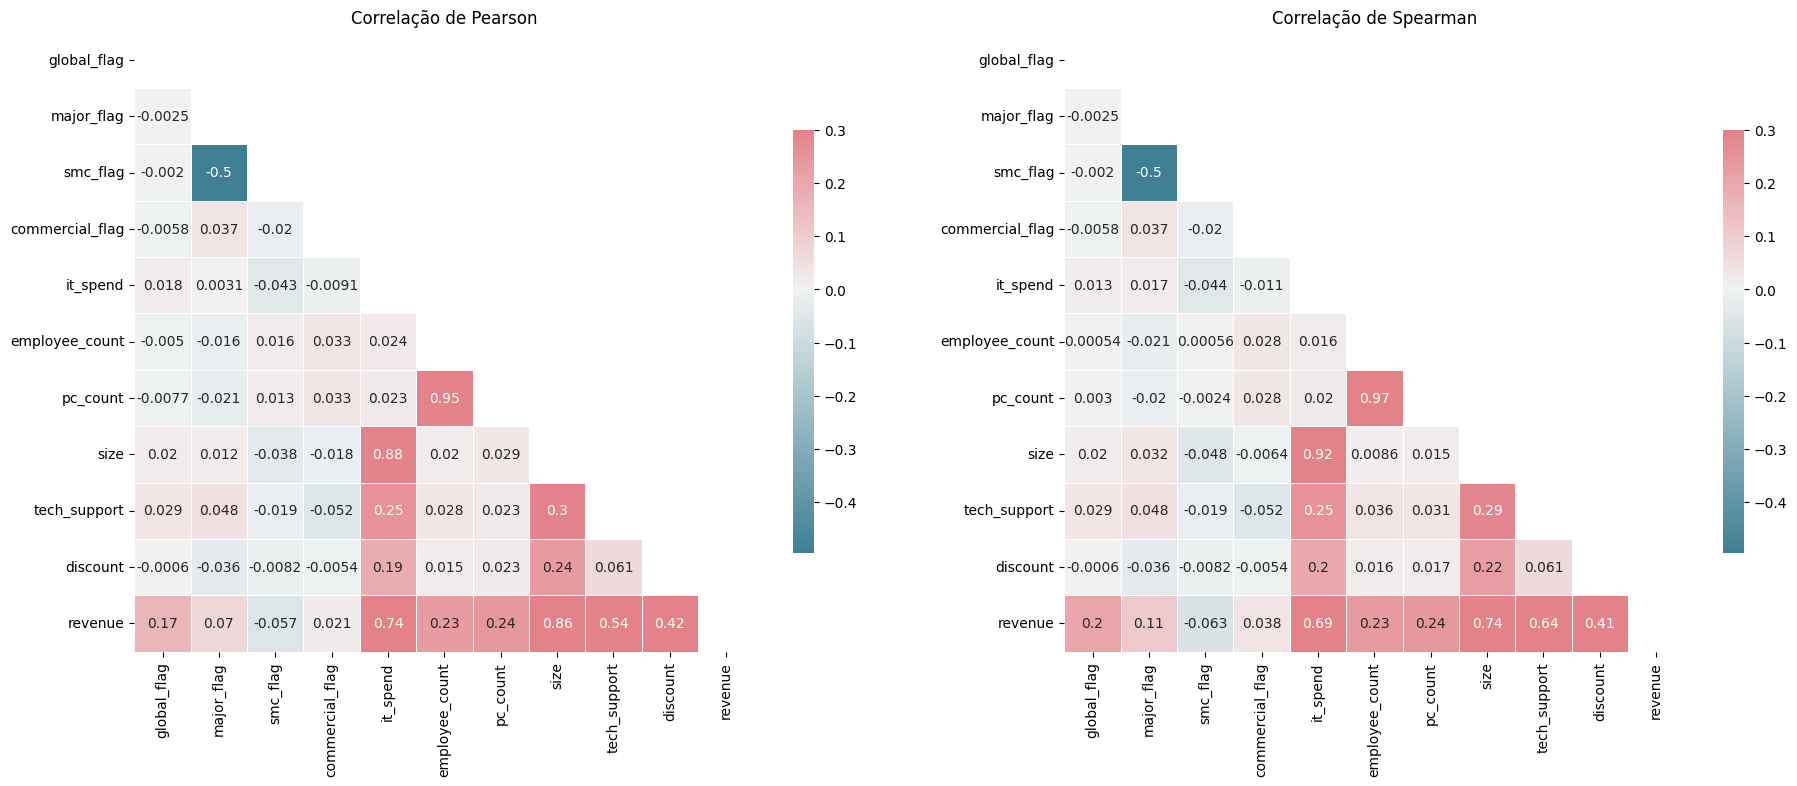

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))

ax1.set_title('Correlação de Pearson')
ax2.set_title('Correlação de Spearman')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, ax=ax1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

corr = df.corr(method='spearman')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, ax=ax2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

As variáveis *employee_count* e *pc_count* têm alta correlação entre si e correlação semelhante com a variável alvo *revenue*. Então escolhemos manter a variável *employee_count* pois ela tem mais significado para o contexto do problema.

As variáveis *it_spend* e *size* têm alta correlação entre si, mas *size* possui mais correlação com a variável alvo *revenue*. Então escolhemos manter a variável *size*.

As variáveis *major_flag*, *smc_flag* e *comercial_flag* têm pouca correlação com a variável alvo *revenue*. Então foram removidas.

A variável *discount* representa outro tratamento atribuido no problema, mas, para simplificar e trabalharmos com um tratamento binário, vamos remover ela e seu efeito sobre a variável *revenue*.

In [15]:
df.head(10)

,global_flag,major_flag,smc_flag,commercial_flag,it_spend,employee_count,pc_count,size,tech_support,discount,revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.363000
1,0,0,1,1,20842,107,70,159038,0,1,14981.435590
2,0,0,0,1,82171,10,7,264935,1,1,32917.138940
3,0,0,0,0,30288,40,39,77522,1,1,14773.768550
4,0,0,1,0,25930,37,43,91446,1,1,17098.698230
5,0,0,1,0,34597,44,51,218703,1,0,17280.709180
6,1,0,0,0,40199,21,14,126342,0,0,9153.974376
7,0,0,1,1,30454,11,8,96784,0,0,5760.075096
8,0,0,0,1,23428,50,55,77298,1,1,17265.111460
9,0,0,1,1,7970,131,153,77888,1,1,21953.371790


## Removendo a influência do *discount*

In [16]:
df['revenue'] = df['revenue'] - 0.05*df['size']*df['discount']

df.head(10)

,global_flag,major_flag,smc_flag,commercial_flag,it_spend,employee_count,pc_count,size,tech_support,discount,revenue
0,1,0,1,0,45537,26,26,152205,0,1,10078.113000
1,0,0,1,1,20842,107,70,159038,0,1,7029.535590
2,0,0,0,1,82171,10,7,264935,1,1,19670.388940
3,0,0,0,0,30288,40,39,77522,1,1,10897.668550
4,0,0,1,0,25930,37,43,91446,1,1,12526.398230
5,0,0,1,0,34597,44,51,218703,1,0,17280.709180
6,1,0,0,0,40199,21,14,126342,0,0,9153.974376
7,0,0,1,1,30454,11,8,96784,0,0,5760.075096
8,0,0,0,1,23428,50,55,77298,1,1,13400.211460
9,0,0,1,1,7970,131,153,77888,1,1,18058.971790


## Exportando o arquivo

In [18]:
treatment = 'tech_support'
outcome = 'revenue'
covariates = ['global_flag', 'size', 'employee_count']
all_attributes = covariates + [treatment, outcome]

df_limitado = df[all_attributes]
df_limitado.head()

,global_flag,size,employee_count,tech_support,revenue
0,1,152205,26,0,10078.11300
1,0,159038,107,0,7029.53559
2,0,264935,10,1,19670.38894
3,0,77522,40,1,10897.66855
4,0,91446,37,1,12526.39823


In [23]:
df_limitado.to_csv("software_promotion_alterado.csv", index=False, index_label=False)